## Data Analysis

Like the real analysts!

In [39]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/launch_04.csv', sep=None)
data

/var/folders/rs/4ym7352x37df592tnnlbw2mm0000gn/T/ipykernel_10293/859546965.py:4: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.



,Time (milliseconds),ax,ay,az,mx,my,mz,ts,alti
0,350676,48,-32,-1056,18000,12750,79950,350653,395.6435
1,350731,64,-48,-544,18150,13200,79800,350710,396.2592
2,350764,80,-48,-1216,18300,13200,79800,350743,395.3079
3,350795,64,-64,-992,19050,12000,80850,350774,395.8892
4,350860,96,-80,-1056,18300,12450,80400,350838,395.3079
...,...,...,...,...,...,...,...,...,...
2192,460091,960,-208,112,-48300,1950,40500,460070,392.0368
2193,460140,960,-176,144,-47850,3000,40500,460117,392.1953
2194,460193,976,-192,144,-47700,3450,40050,460172,392.8427
2195,460262,976,-192,112,-48000,2250,40350,460238,392.5996


In [41]:
# Compute total acceleration as L2-distance of 3d acceleration vector.
data['total_acceleration'] = np.sqrt(data['ax']**2 + data['ay']**2 + data['az']**2)
# Compute height over ground, use 10% quantile as ground level.
data['height_over_ground'] = data['alti'] - data['alti'].quantile(0.1)


In [42]:
# Limit time range to flight phase
data = data[data['ts'] > 408000]
data = data[data['ts'] < 418000]



In [43]:
# We want the time axis to be zero at launch time.
# -> find the last time when acceleration is below the 85% quantile.
a_baseline = data['total_acceleration'].quantile(0.85)
print(a_baseline)
first = data[data['total_acceleration'] > a_baseline].iloc[0]
print(first)
# Compute countdown time as seconds, zero at launch
data['countdown_ts'] = (data['ts'] - first['ts'])/1000
data

1123.5454408562018
Time (milliseconds)    408989.000000
ax                       -320.000000
ay                        432.000000
az                      -1056.000000
mx                      19350.000000
my                      13200.000000
mz                      80100.000000
ts                     408967.000000
alti                      395.910400
total_acceleration       1184.972574
height_over_ground          4.272600
Name: 1170, dtype: float64


,Time (milliseconds),ax,ay,az,mx,my,mz,ts,alti,total_acceleration,height_over_ground,countdown_ts
1149,408032,80,-64,-1024,19200,13350,79950,408011,395.5986,1029.112239,3.9608,-0.956
1150,408067,0,16,-992,17850,13500,80700,408043,395.1098,992.129024,3.4720,-0.924
1151,408102,112,-80,-992,18900,12750,80100,408078,395.3555,1001.502871,3.7177,-0.889
1152,408168,16,-16,-1008,19050,13650,80550,408146,395.8443,1008.253936,4.2065,-0.821
1153,408200,112,-48,-1008,18750,12750,80550,408178,396.0874,1015.338367,4.4496,-0.789
...,...,...,...,...,...,...,...,...,...,...,...,...
1346,417790,912,432,80,-42300,-1350,10350,417769,391.8889,1012.308253,0.2511,8.802
1347,417858,912,448,80,-41400,-1650,9150,417835,391.7145,1019.238932,0.0767,8.868
1348,417893,912,432,64,-41400,-2400,9300,417872,391.3128,1011.169620,-0.3250,8.905
1349,417942,896,464,48,-41550,-1500,9150,417919,390.5809,1010.156424,-1.0569,8.952


2.74 38.44509999999997


<Axes: title={'center': 'Height over ground and acceleration'}, xlabel='Time (s)', ylabel='Height Over Ground [m]'>

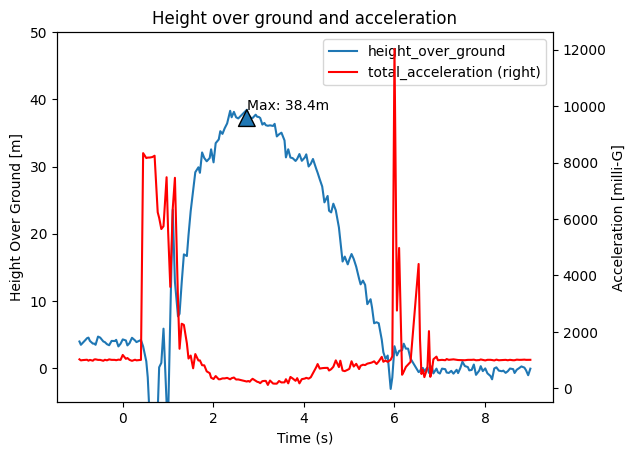

In [46]:
import matplotlib.pyplot as plt

#pd.options.plotting.backend = 'matplotlib'
# Dein ursprünglicher Plot
ax = data.plot(x='countdown_ts', y=['height_over_ground'], title="Height over ground and acceleration", ylim=(-5,50))

# Daten für die zweite Achse plotten
data.plot(x='countdown_ts', y=['total_acceleration'], secondary_y=True, ax=ax, color='r')

# Achsenbeschriftungen hinzufügen
ax.set_ylabel('Height Over Ground [m]')
ax.right_ax.set_ylabel('Acceleration [milli-G]')
ax.set_xlabel("Time (s)")

max_idx = data['height_over_ground'].idxmax()
max_ts = data.loc[max_idx]['countdown_ts']
max_height = data['height_over_ground'].max()
print(max_ts, max_height)
ax.annotate(text=f'Max: {max_height:.1f}m', xy=(max_ts, max_height), arrowprops={'width':3})
ax